# Advanced Machine Learning - laboratory 9 - Density estimation

Patrycja Wysocka, 306022

### Task 1

In [2]:
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

- samples generation

In [3]:
def generate_dataset(n: int = 200) -> np.array:
    sample_1 = np.random.normal(5, 1, int(n*0.9))
    sample_2 = np.random.normal(10, 1, int(n*0.1))

    return np.concatenate((sample_1, sample_2))

dataset = generate_dataset(200)

- approximate f using **Kernel density estimator**

In [4]:
def f(x: float) -> float:
    """
    function calculating density using
    Gaussian Mixture Model (GMM)
    """
    return 0.9*norm.pdf(x, 5, 1) + 0.1*norm.pdf(x, 10, 1)

-  Draw density function corresponding to theoretical distribution and estimated function ˆfn

In [5]:
def calculate_density(dataset, kernel='gaussian', bandwidth=1):
    # fit KDE to the dataset
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(dataset.reshape(-1, 1))

    # x-value range for plotting KDE
    x_range = np.linspace(2, 12, 200)

    # compute the log-likelihood of each sample
    log_density = kde.score_samples(x_range[:, np.newaxis])

    y_estimated = np.exp(log_density)
    y_theoretical = [f(x) for x in x_range]
    
    return x_range, y_estimated, y_theoretical

x_range, y_estimated, y_theoretical = calculate_density(dataset)

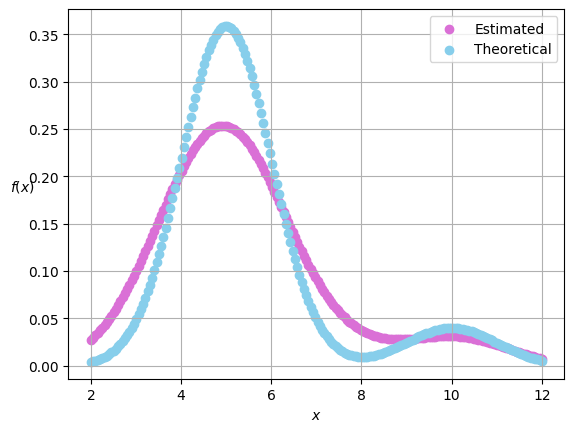

In [16]:
plt.scatter(x_range, y_estimated, color='orchid', label='Estimated')
plt.scatter(x_range, y_theoretical, color='skyblue', label='Theoretical')
    
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation='horizontal')
plt.grid()
plt.legend()
plt.show()

- computer mean square error

In [17]:
mse = mean_squared_error(y_estimated, y_theoretical)
print(f'Mean square error: {mse}')

Mean square error: 0.0017599269093386556


- analyse how the error depends on size `n`

In [25]:
mse_errors =[]

sample_sizes = [50, 90, 100, 200, 300, 500, 600, 750, 1000, 1200, 1500]

for n in sample_sizes:
    dataset = generate_dataset(n)
    
    x_range, y_estimated, y_theoretical = calculate_density(dataset)
    
    mse_errors.append(mean_squared_error(y_estimated, y_theoretical))

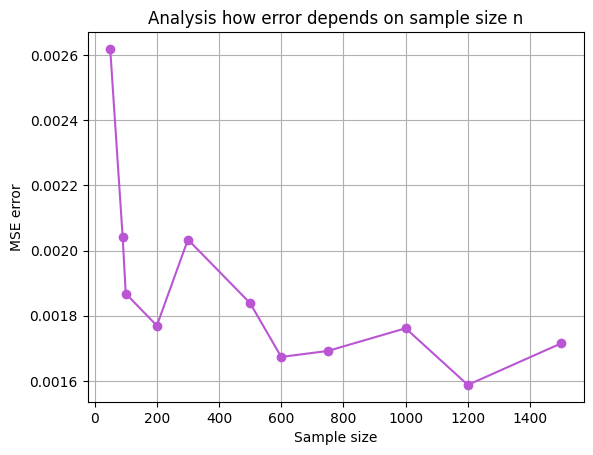

In [26]:
plt.plot(sample_sizes, mse_errors, '-o', color='mediumorchid')
plt.title('Analysis how error depends on sample size n')
plt.xlabel("Sample size")
plt.ylabel("MSE error")
plt.grid()
plt.show()

- analyse the influence of different kernel functions and smoothing parameters

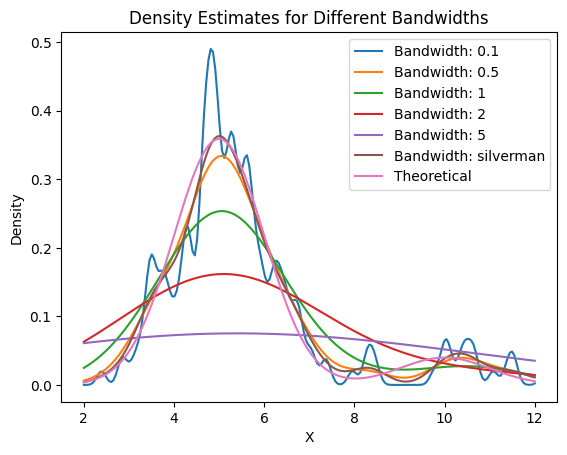

In [41]:
kernels = ['gaussian' , 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
smoothing_parameters = [0.1, 0.5, 1, 2, 5, 'silverman']
densities = []

# kernel exploration 
dataset = generate_dataset(200)

fig, ax = plt.subplots()

# Iterate over each bandwidth
for bandwidth in smoothing_parameters:
    x_range, y_estimated, y_theoretical = calculate_density(dataset, 'gaussian', bandwidth)
    
    # Plot the density estimate for the current bandwidth
    ax.plot(x_range, y_estimated, label=f'Bandwidth: {bandwidth}')

ax.plot(x_range, y_theoretical, label='Theoretical')

ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title('Density Estimates for Different Bandwidths')

plt.show()

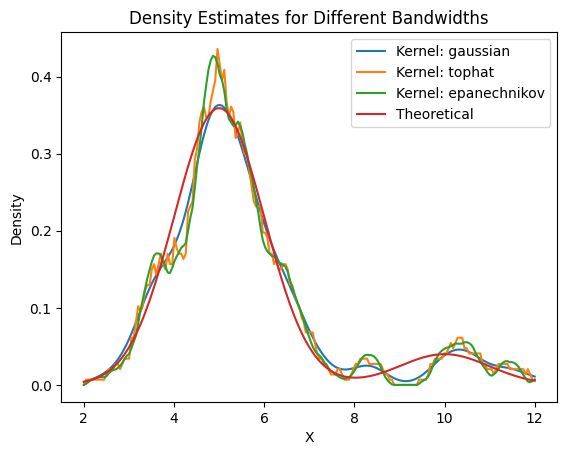

In [43]:
fig, ax = plt.subplots()

# Iterate over each bandwidth
for kernel in kernels[:3]:
    x_range, y_estimated, y_theoretical = calculate_density(dataset, kernel, bandwidth='silverman')
    
    # Plot the density estimate for the current bandwidth
    ax.plot(x_range, y_estimated, label=f'Kernel: {kernel}')

ax.plot(x_range, y_theoretical, label='Theoretical')

ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title('Density Estimates for Different Kernels')

plt.show()

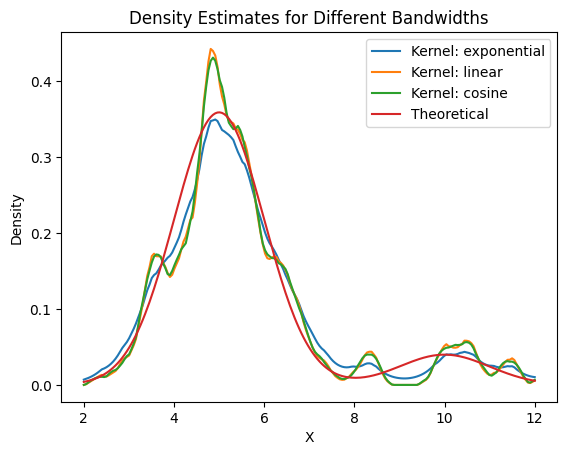

In [44]:
fig, ax = plt.subplots()

# Iterate over each bandwidth
for kernel in kernels[3:]:
    x_range, y_estimated, y_theoretical = calculate_density(dataset, kernel, bandwidth='silverman')
    
    # Plot the density estimate for the current bandwidth
    ax.plot(x_range, y_estimated, label=f'Kernel: {kernel}')

ax.plot(x_range, y_theoretical, label='Theoretical')

ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title('Density Estimates for Different Kernels')

plt.show()

### Task 2

In [17]:
# method 1
dataset = generate_dataset(200)
x_range_1, y_estimated_1, y_theoretical_1 = calculate_density(dataset)

def create_artificial_dataset(core_dataset, k, n, bandwidth):
    artificial_dataset = []
    
    for _ in range(k):
        i = np.random.randint(0, n)
        epsilon = np.random.normal(0, 1)
        
        x = core_dataset[i]
        new_x = x + epsilon * bandwidth
        artificial_dataset.append(new_x)
        
    return np.array(artificial_dataset)

artificial_dataset = create_artificial_dataset(dataset, 300, 200, 0.5)
    
x_range_2, y_estimated_2, y_theoretical_2 = calculate_density(artificial_dataset)
